# Machine Learning & the Stock Market
Machine learning is an interesting and mindblowing way of analyzing trends and patterns by a computer with tons and tons of data. With that being said, to test the effectiveness of this machine learning, we apply it to a very volatile, multimodal, and arguably random model of the Stock Market.



To start we first load the data from a .CSV file into a Panda Dataframe and display it. The data was sourced from  http://Quandl.com which is an organization that specializes with programming and data mining from the Stock Market. 


In [1]:
filename = 'NSE-TATAGLOBAL11.csv'
Stocks = ['NSE-TATAGLOBAL11.csv','EOD-MSFT.csv','EOD-NKE.csv','EOD-AAPL.csv','EOD-TRV.csv','EOD-INTC.csv']

In [2]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from pandas.plotting import register_matplotlib_converters
from fastai.structured import  add_datepart
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from pmdarima import auto_arima
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
import warnings
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 20,10
df = pd.read_csv(filename )
print("Stock: ",filename )
df.head()


/Users/farazmost/anaconda3/lib/python3.7/site-packages/statsmodels/compat/pandas.py:23: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  data_klasses = (pandas.Series, pandas.DataFrame, pandas.Panel)
Using TensorFlow backend.


Stock:  NSE-TATAGLOBAL11.csv


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Next to better understand our data, we graph it. In order to do so we need to index the dataframe accordingly and that calculations can be done further:

In [3]:
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df = df.drop('Date',axis=1)
print("Stock: ",filename )
df.head()

Stock:  NSE-TATAGLOBAL11.csv


,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,,
2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


Now with the index adjusted, we can graph our stock:

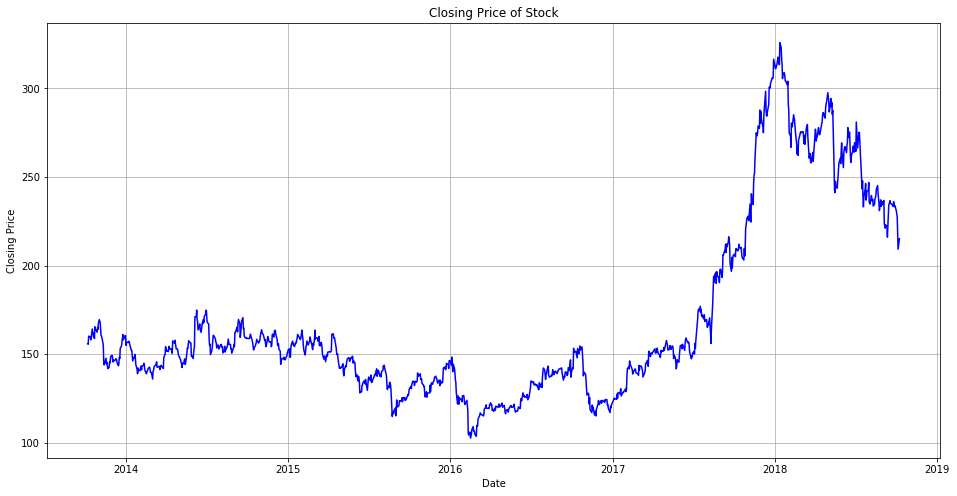

In [4]:
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
plt.figure(figsize=(16,8))
plt.plot(df['Close'], c='blue')
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.title("Closing Price of Stock")
plt.grid(True)

## Applying Machine Learning methods/ Testing accuracy of each

To get a better sense of our accuracy in testing, we will split our data set into training and validating. we use the first 9/10 of data for training and use the last 1/10 as a test to check the accuracy of our method

### Linear Regression 

In [5]:
from fastai.structured import  add_datepart

df = pd.read_csv(filename)
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
    

add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
    
    
train = new_data[:987]
valid = new_data[987:]
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

model = LinearRegression()
model.fit(x_train,y_train)

preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print("Root Means Squared value for Linear Regression is: {0:.2f}".format(rms))


Root Means Squared value for Linear Regression is: 121.16


What does this look like visually? Lets look at the graph of actual closing prices VS predicted closing prices:


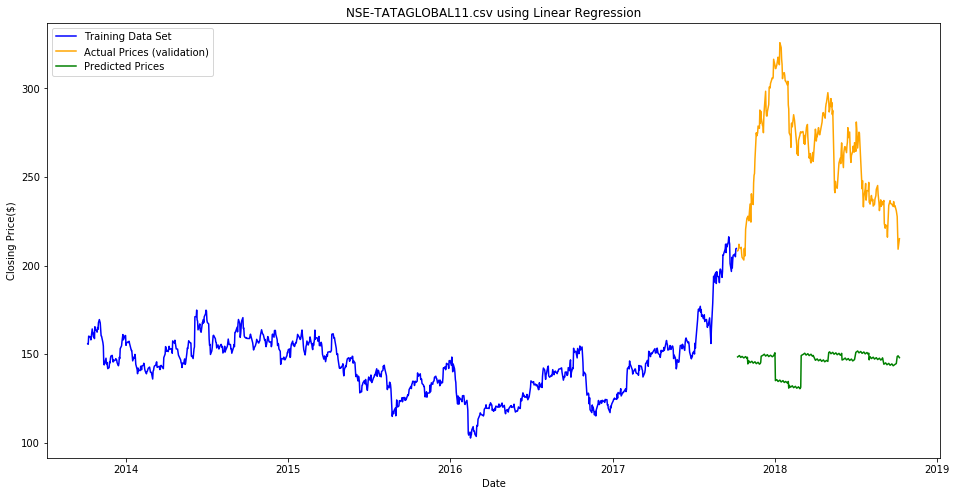

In [6]:
valid['Predictions'] = 0
valid['Predictions'] = preds
valid.index = data[987:].index
train.index = data[:987].index


plt.figure(figsize=(16,8))
plt.plot(train['Close'],label="Training Data Set",c = "blue")
plt.plot(valid[['Close']],label="Actual Prices (validation)",c = "orange")
plt.plot(valid[[ 'Predictions']],label="Predicted Prices",c = "green")

plt.xlabel("Date")
plt.ylabel("Closing Price($)")
plt.title(filename+" using Linear Regression")
plt.legend()

Lets see a general trend for different types of stocks with different prices ranges and volatility:



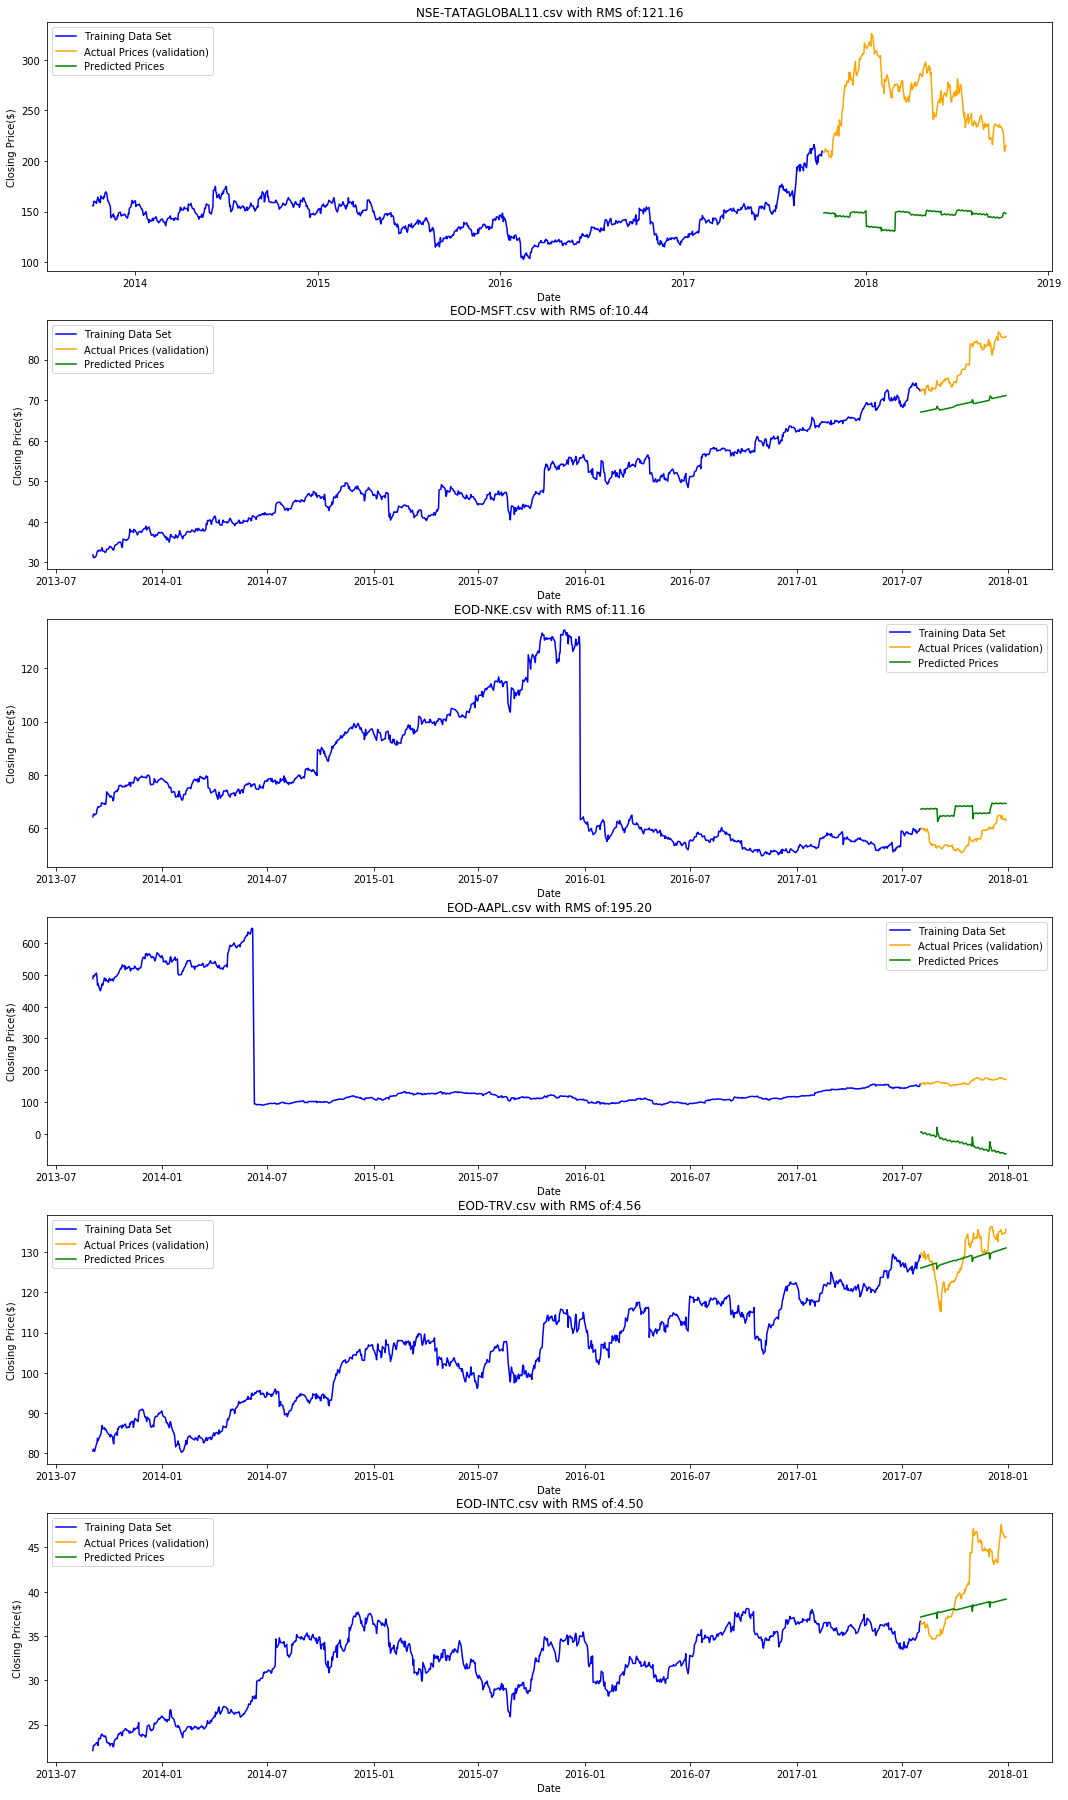

In [8]:
import warnings
warnings.filterwarnings("ignore")

Stocks = ['NSE-TATAGLOBAL11.csv','EOD-MSFT.csv','EOD-NKE.csv','EOD-AAPL.csv','EOD-TRV.csv','EOD-INTC.csv']

fig, axarr = plt.subplots(len(Stocks), 1)
fig.set_size_inches(18, 32)
j=0
for i in Stocks:
    x,y,z,rms = MakinMoney(i,'Linear Regression')
    axarr[j].plot(x,label="Training Data Set", c = "blue")
    axarr[j].plot(y,label="Actual Prices (validation)", c = "orange")
    axarr[j].plot(z,label="Predicted Prices",c = "green")
    axarr[j].set_xlabel("Date")
    axarr[j].set_ylabel("Closing Price($)")     
    axarr[j].set_title(i + " with RMS of:{0:.2f}".format(rms))
    axarr[j].legend()
    j=j+1

### K-Neighbor

In [9]:
from fastai.structured import  add_datepart
df = pd.read_csv(filename)
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]


add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
    
    
train = new_data[:987]
valid = new_data[987:]
x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']
    
scaler = MinMaxScaler(feature_range=(0, 1))
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

    
model.fit(x_train,y_train)
preds = model.predict(x_valid)        
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print("Root Means Squared value for the K-Neighbors method is:",rms)

Root Means Squared value for the K-Neighbors method is: 114.820692914522


What does this look like visually? Lets look at the graph of actual closing prices VS predicted closing prices:

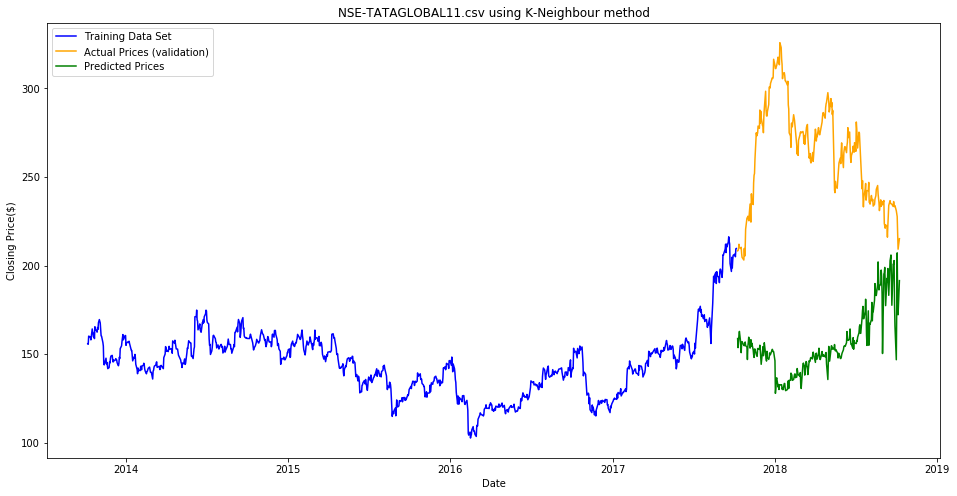

In [10]:
valid['Predictions'] = 0
valid['Predictions'] = preds
valid.index = data[987:].index
train.index = data[:987].index

plt.figure(figsize=(16,8))
plt.plot(train['Close'],label="Training Data Set",c = "blue")
plt.plot(valid[['Close']],label="Actual Prices (validation)",c = "orange")
plt.plot(valid[[ 'Predictions']],label="Predicted Prices",c = "green")

plt.xlabel("Date")
plt.ylabel("Closing Price($)")
plt.title(filename+" using K-Neighbour method")
plt.legend()

Lets see a general trend for different types of stocks with different prices ranges and volatility:


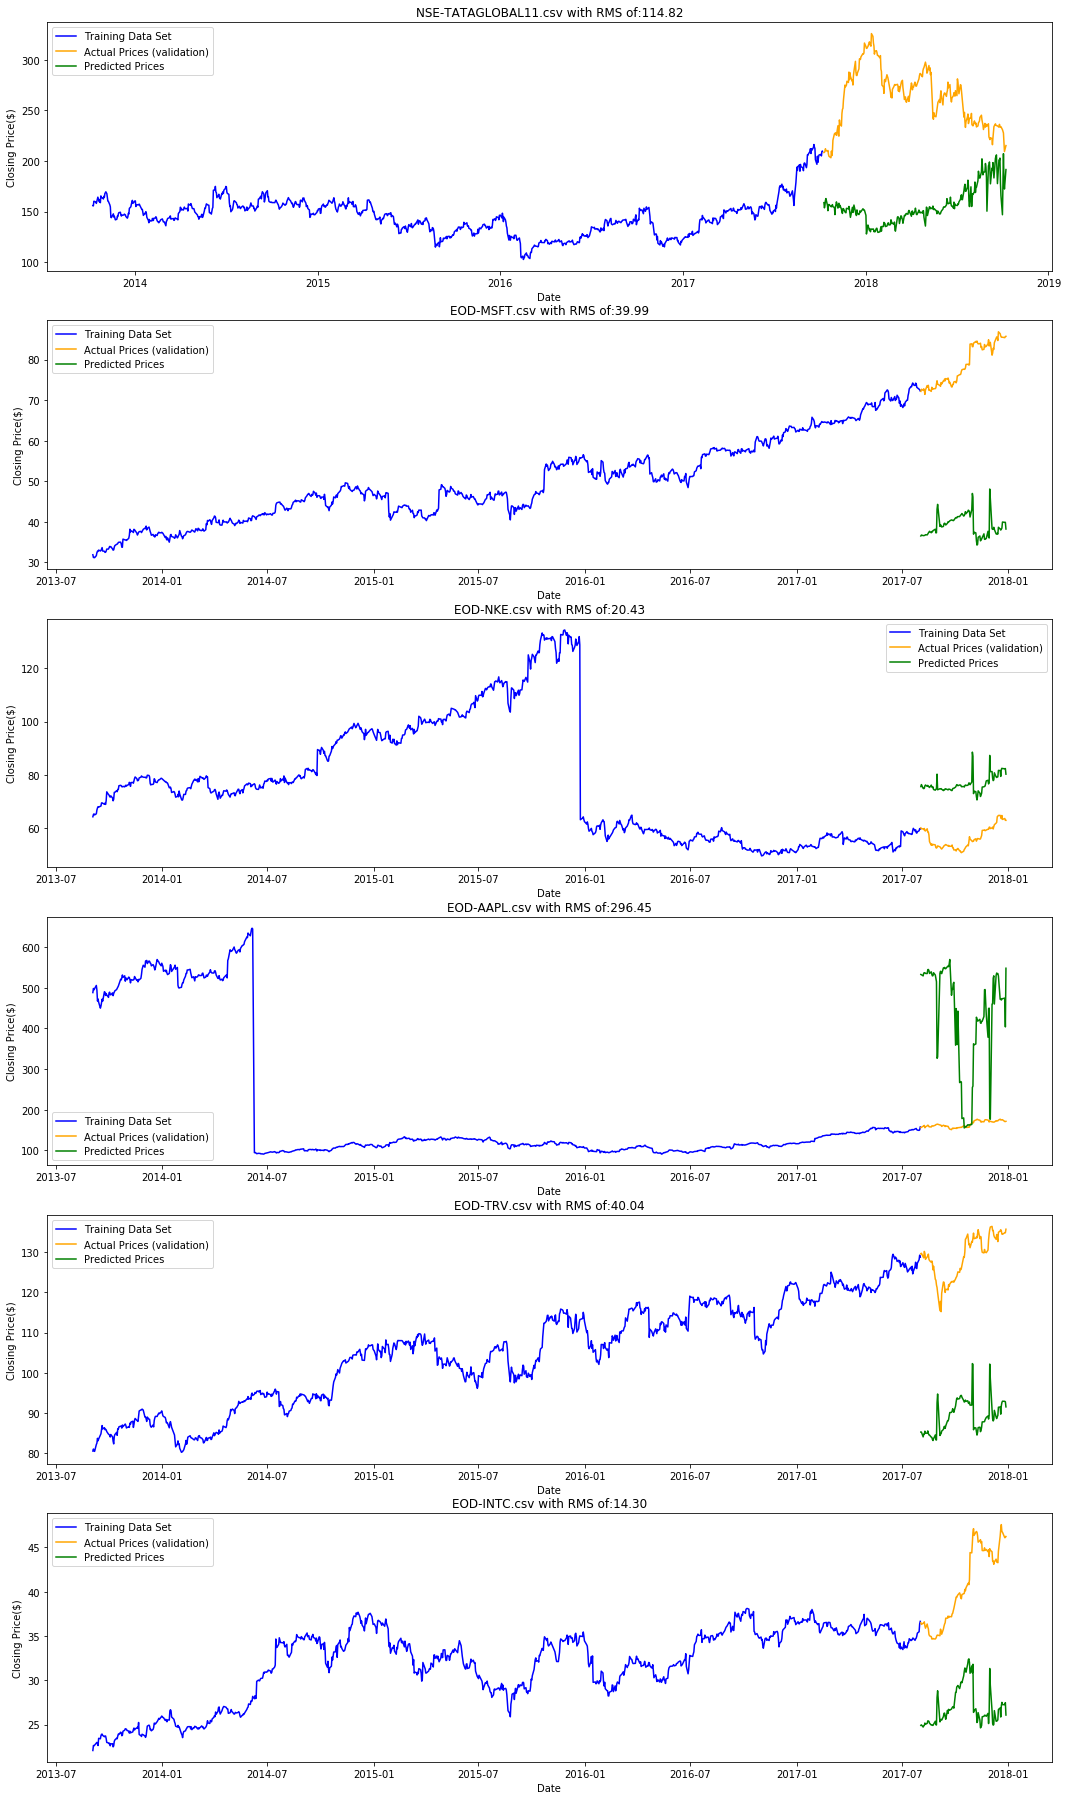

In [11]:
import warnings
warnings.filterwarnings("ignore")

Stocks = ['NSE-TATAGLOBAL11.csv','EOD-MSFT.csv','EOD-NKE.csv','EOD-AAPL.csv','EOD-TRV.csv','EOD-INTC.csv']

fig, axarr = plt.subplots(len(Stocks), 1)
fig.set_size_inches(18, 32)
j=0
for i in Stocks:
    x,y,z,rms = MakinMoney(i,'KNeighbour')
    axarr[j].plot(x,label="Training Data Set", c = "blue")
    axarr[j].plot(y,label="Actual Prices (validation)", c = "orange")
    axarr[j].plot(z,label="Predicted Prices",c = "green")
    axarr[j].set_xlabel("Date")
    axarr[j].set_ylabel("Closing Price($)")     
    axarr[j].set_title(i + " with RMS of:{0:.2f}".format(rms))
    axarr[j].legend()
    j=j+1

### Auto-ARIMA
ARIMA is a statistical method of anaylzying sequential data. In the previous methods, often decisions for the prediction is made from mathematical methods of interpretation. ARIMA utilizes a series of cells that hold 'old' information it deems important for later predicting:
- p (past values used for forecasting the next value)
- q (past forecast errors used to predict the future values)
- d (order of differencing)

Finding these parameters and defining the best one for the problem is an often hard. Parameter tuner often takes a lot of time and that where AUTO-ARIMA is used, where the program will find the most optimal parameters.

In [13]:
from fastai.structured import  add_datepart
df = pd.read_csv(filename)
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)

#add_datepart(new_data,'Date')
#new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
    
    
train = data[:987]
valid = data[987:]
    
training = train['Close']
validation = valid['Close']

model = auto_arima(training
                  ,start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, d=1
                  ,D=1, trace=True,error_action='ignore'
                   ,seasonal=True, suppress_warnings=True)

model.fit(training)

forecast = model.predict(n_periods=len(valid))
forecast1 = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast1['Prediction'])),2)))
print("Root Means Squared value for the ARIMA method is:",rms)


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4820.561, BIC=4844.968, Fit time=4.307 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5479.245, BIC=5489.008, Fit time=0.081 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5170.275, BIC=5189.801, Fit time=0.990 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4818.529, BIC=4838.055, Fit time=3.326 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4816.433, BIC=4840.840, Fit time=2.302 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=5170.276, BIC=5189.801, Fit time=1.067 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=4818.340, BIC=4847.629, Fit time=11.481 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5481.156, BIC=5495.800, Fit time=0.190 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=4818.627, BIC=4852.797, Fit time=9.119 seconds
Fit ARIMA: order=(1, 1, 1) 

What does this look like visually? Lets look at the graph of actual closing prices VS predicted closing prices:

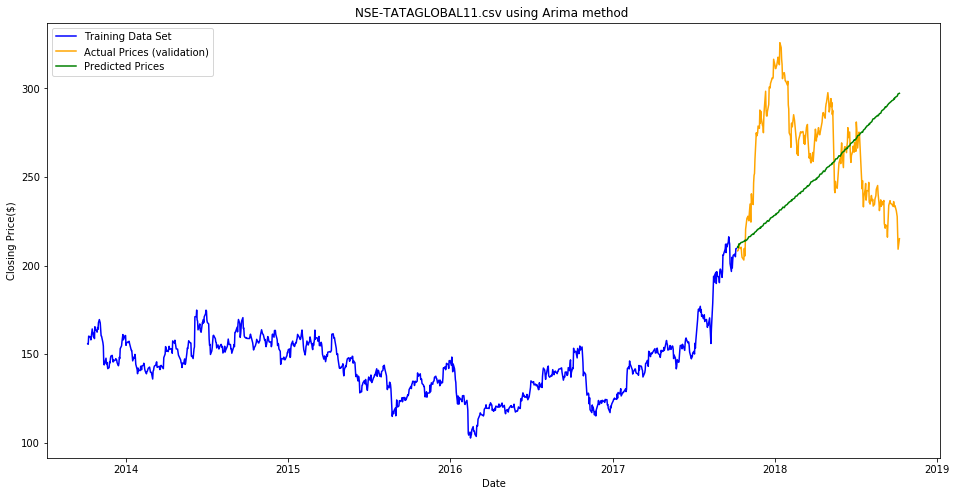

In [14]:
valid['Predictions'] = 0
valid['Predictions'] = forecast
valid.index = data[987:].index
forecast1.index = data[987:].index
train.index = data[:987].index

plt.figure(figsize=(16,8))
plt.plot(train['Close'],label="Training Data Set",c = "blue")
plt.plot(valid[['Close']],label="Actual Prices (validation)",c = "orange")
plt.plot(valid[[ 'Predictions']],label="Predicted Prices",c = "green")

plt.xlabel("Date")
plt.ylabel("Closing Price($)")
plt.title(filename+" using Arima method ")
plt.legend()

Lets see a general trend for different types of stocks with different prices ranges and volatility:


Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 5); AIC=4819.185, BIC=4843.628, Fit time=1.153 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 5); AIC=5445.442, BIC=5455.219, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 5); AIC=5192.892, BIC=5212.446, Fit time=0.232 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 5); AIC=4817.196, BIC=4836.750, Fit time=1.222 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 5); AIC=4818.677, BIC=4843.120, Fit time=1.462 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 5); AIC=5444.758, BIC=5459.424, Fit time=0.103 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 5); AIC=4818.656, BIC=4843.099, Fit time=2.023 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 5); AIC=4818.696, BIC=4848.028, Fit time=2.702 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 5); AIC=4815.203, BIC=4829.869, Fit time=0.629 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_o

Fit ARIMA: order=(0, 1, 2) seasonal_order=(0, 1, 1, 5); AIC=1195.914, BIC=1220.357, Fit time=2.086 seconds
Fit ARIMA: order=(1, 1, 2) seasonal_order=(0, 1, 1, 5); AIC=1197.921, BIC=1227.253, Fit time=2.090 seconds
Total fit time: 14.509 seconds


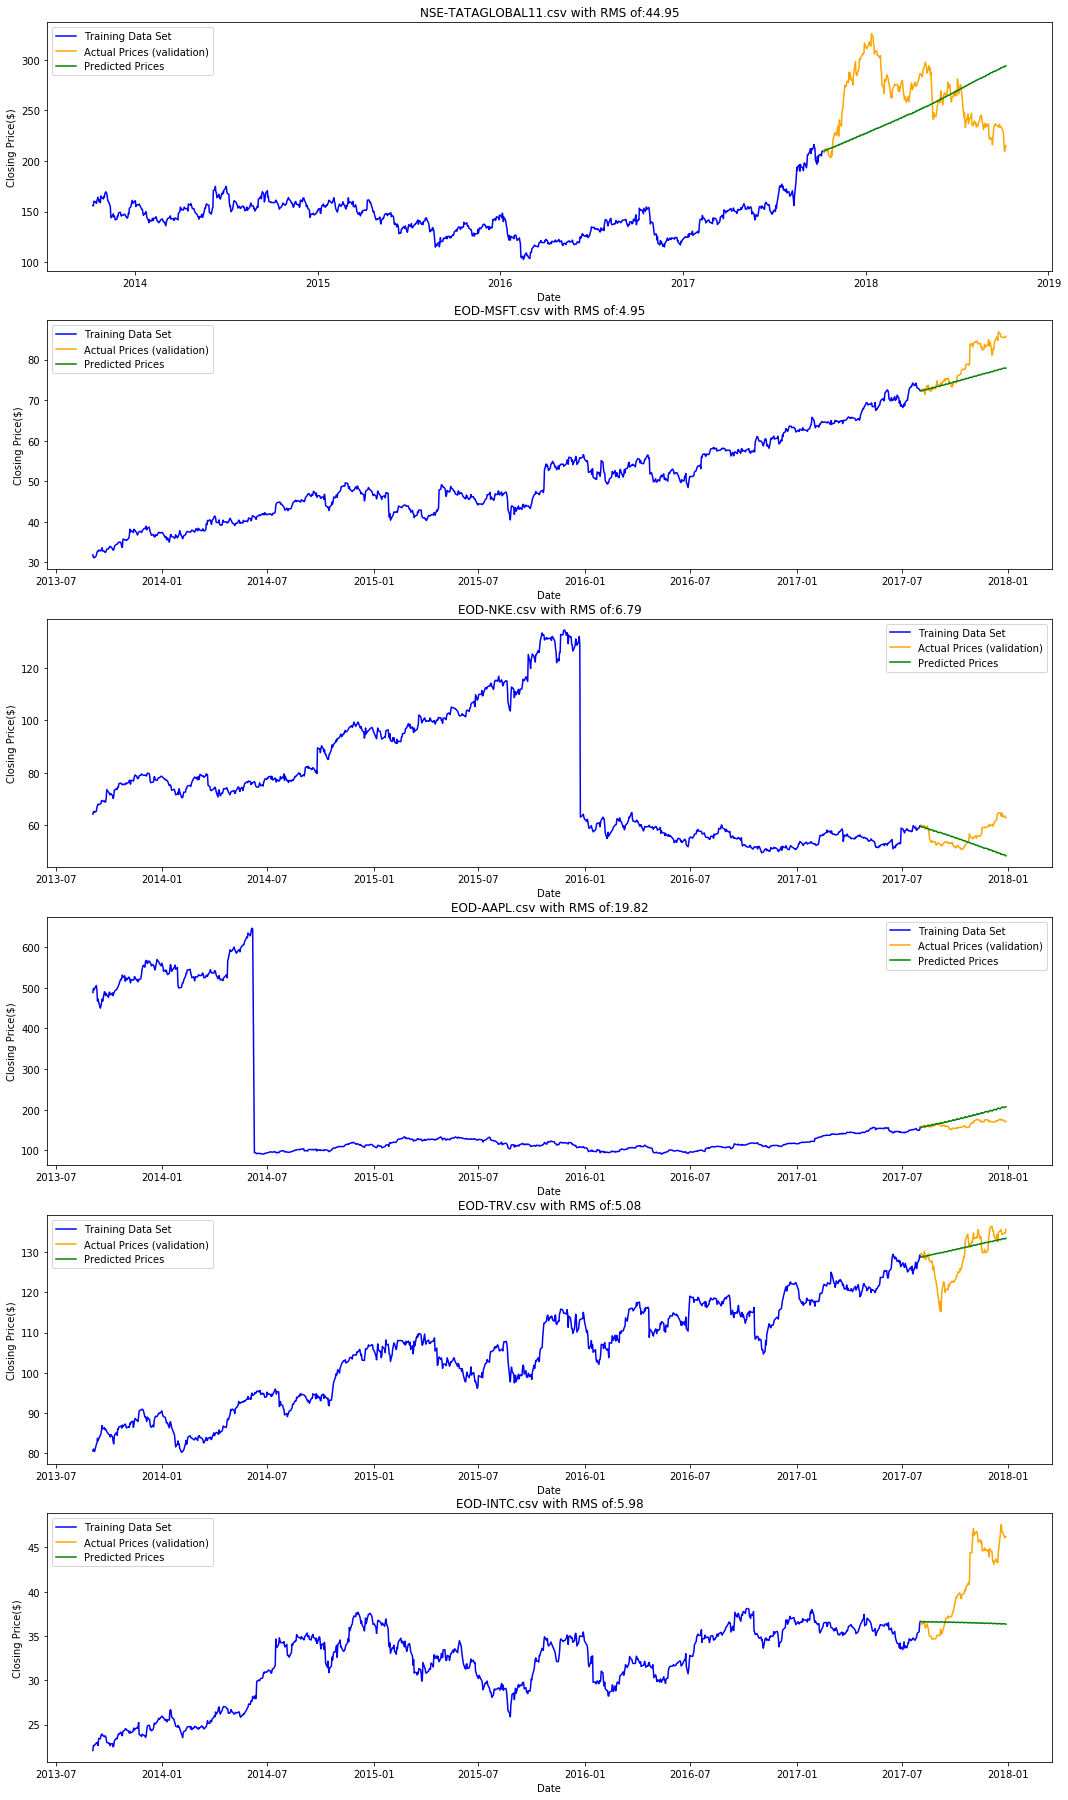

In [15]:
import warnings
warnings.filterwarnings("ignore")

Stocks = ['NSE-TATAGLOBAL11.csv','EOD-MSFT.csv','EOD-NKE.csv','EOD-AAPL.csv'
          ,'EOD-TRV.csv','EOD-INTC.csv'
         ]

fig, axarr = plt.subplots(len(Stocks), 1)
fig.set_size_inches(18, 32)
j=0
for i in Stocks:
    x,y,z,rms = MakinMoney(i,'ARIMA')
    axarr[j].plot(x,label="Training Data Set", c = "blue")
    axarr[j].plot(y,label="Actual Prices (validation)", c = "orange")
    axarr[j].plot(z,label="Predicted Prices",c = "green")
    axarr[j].set_xlabel("Date")
    axarr[j].set_ylabel("Closing Price($)")     
    axarr[j].set_title(i + " with RMS of:{0:.2f}".format(rms))
    axarr[j].legend()
    j=j+1

### Long Short Term Memory (LSTM)

LSTM is a Sequence prediction algorithm that utilizes a memory cell to store important data and uses that to establish patterns throughout the data. Sequence Prediction has been a problem in data science used in fields such as: predicting sales, from understanding movie plots ,specific speech recognition, language translations, predicting personal keyboard inputs on phones.
$$$$
LSTM is an improvement from Recurrent Neural Networks (RNN) which utilize past scenarios in a feedback loop such as:
<img src="rnn-neuron.png">
This has its limitations of not emphasizing weight on the data and runs into problems (Vanishing Gradient) such as:
<img src="b2_11.png">
LSTM utilizes certain weights and adjustments to the data and stores information selectively and forgets information selectively. It can depend on certain dependencies:
- "The previous cell state (i.e. the information that was present in the memory after the previous time step)
- The previous hidden state (i.e. this is the same as the output of the previous cell)
- The input at the current time step (i.e. the new information that is being fed in at that moment)

for the sake of our argument, these could be:
- The trend that the stock has been following in the previous days, maybe a downtrend or an uptrend.
- The price of the stock on the previous day, because many traders compare the stock’s previous day price before buying it.
- The factors that can affect the price of the stock for today. This can be a new company policy that is being criticized widely, or a drop in the company’s profit, or maybe an unexpected change in the senior leadership of the company.






In [25]:
df = pd.read_csv(filename)
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)): 
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)
dataset = new_data.values
train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

        # create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=1, verbose=1)

        #predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)
        
X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
print("Root Means Squared value for the Long Short Term Memory(LSTM) method is:",rms)




Epoch 1/5
927/927 [==============================] - 50s 54ms/step - loss: 9.0638e-04
Epoch 2/5
927/927 [==============================] - 43s 47ms/step - loss: 4.8176e-04
Epoch 3/5
927/927 [==============================] - 39s 42ms/step - loss: 3.2993e-04
Epoch 4/5
927/927 [==============================] - 44s 48ms/step - loss: 2.7954e-04
Epoch 5/5
927/927 [==============================] - 48s 52ms/step - loss: 2.3658e-04
Root Means Squared value for the Long Short Term Memory(LSTM) method is: 9.571134547428382


What does this look like visually? Lets look at the graph of actual closing prices VS predicted closing prices:

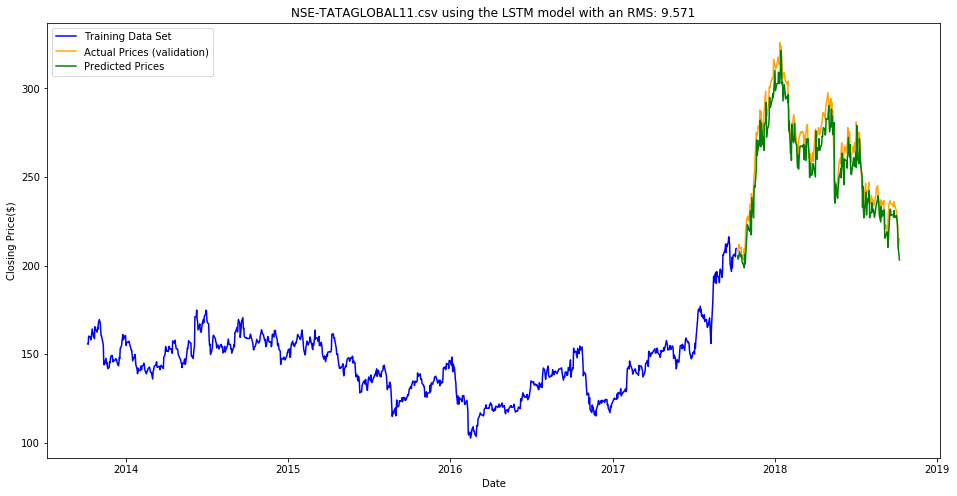

In [27]:
train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
valid.index = data[987:].index


plt.figure(figsize=(16,8))
plt.plot(train['Close'],label="Training Data Set",c = "blue")
plt.plot(valid[['Close']],label="Actual Prices (validation)",c = "orange")
plt.plot(valid[[ 'Predictions']],label="Predicted Prices",c = "green")

plt.xlabel("Date")
plt.ylabel("Closing Price($)")
plt.title(filename+" using the LSTM model with an RMS: {0:.3f}".format(rms))
plt.legend()

Lets see a general trend for different types of stocks with different prices ranges and volatility:


Epoch 1/2
927/927 [==============================] - 25s 27ms/step - loss: 0.0013
Epoch 2/2
927/927 [==============================] - 22s 23ms/step - loss: 6.5983e-04
Epoch 1/2
927/927 [==============================] - 23s 24ms/step - loss: 0.0022
Epoch 2/2
927/927 [==============================] - 22s 24ms/step - loss: 7.4511e-04
Epoch 1/2
927/927 [==============================] - 29s 31ms/step - loss: 0.0077
Epoch 2/2
927/927 [==============================] - 23s 25ms/step - loss: 0.0032
Epoch 1/2
927/927 [==============================] - 23s 25ms/step - loss: 0.0079
Epoch 2/2
927/927 [==============================] - 22s 24ms/step - loss: 0.0045
Epoch 1/2
927/927 [==============================] - 29s 31ms/step - loss: 0.0050
Epoch 2/2
927/927 [==============================] - 22s 24ms/step - loss: 0.0014
Epoch 1/2
927/927 [==============================] - 29s 31ms/step - loss: 0.0030
Epoch 2/2
927/927 [==============================] - 23s 25ms/step - loss: 0.0011


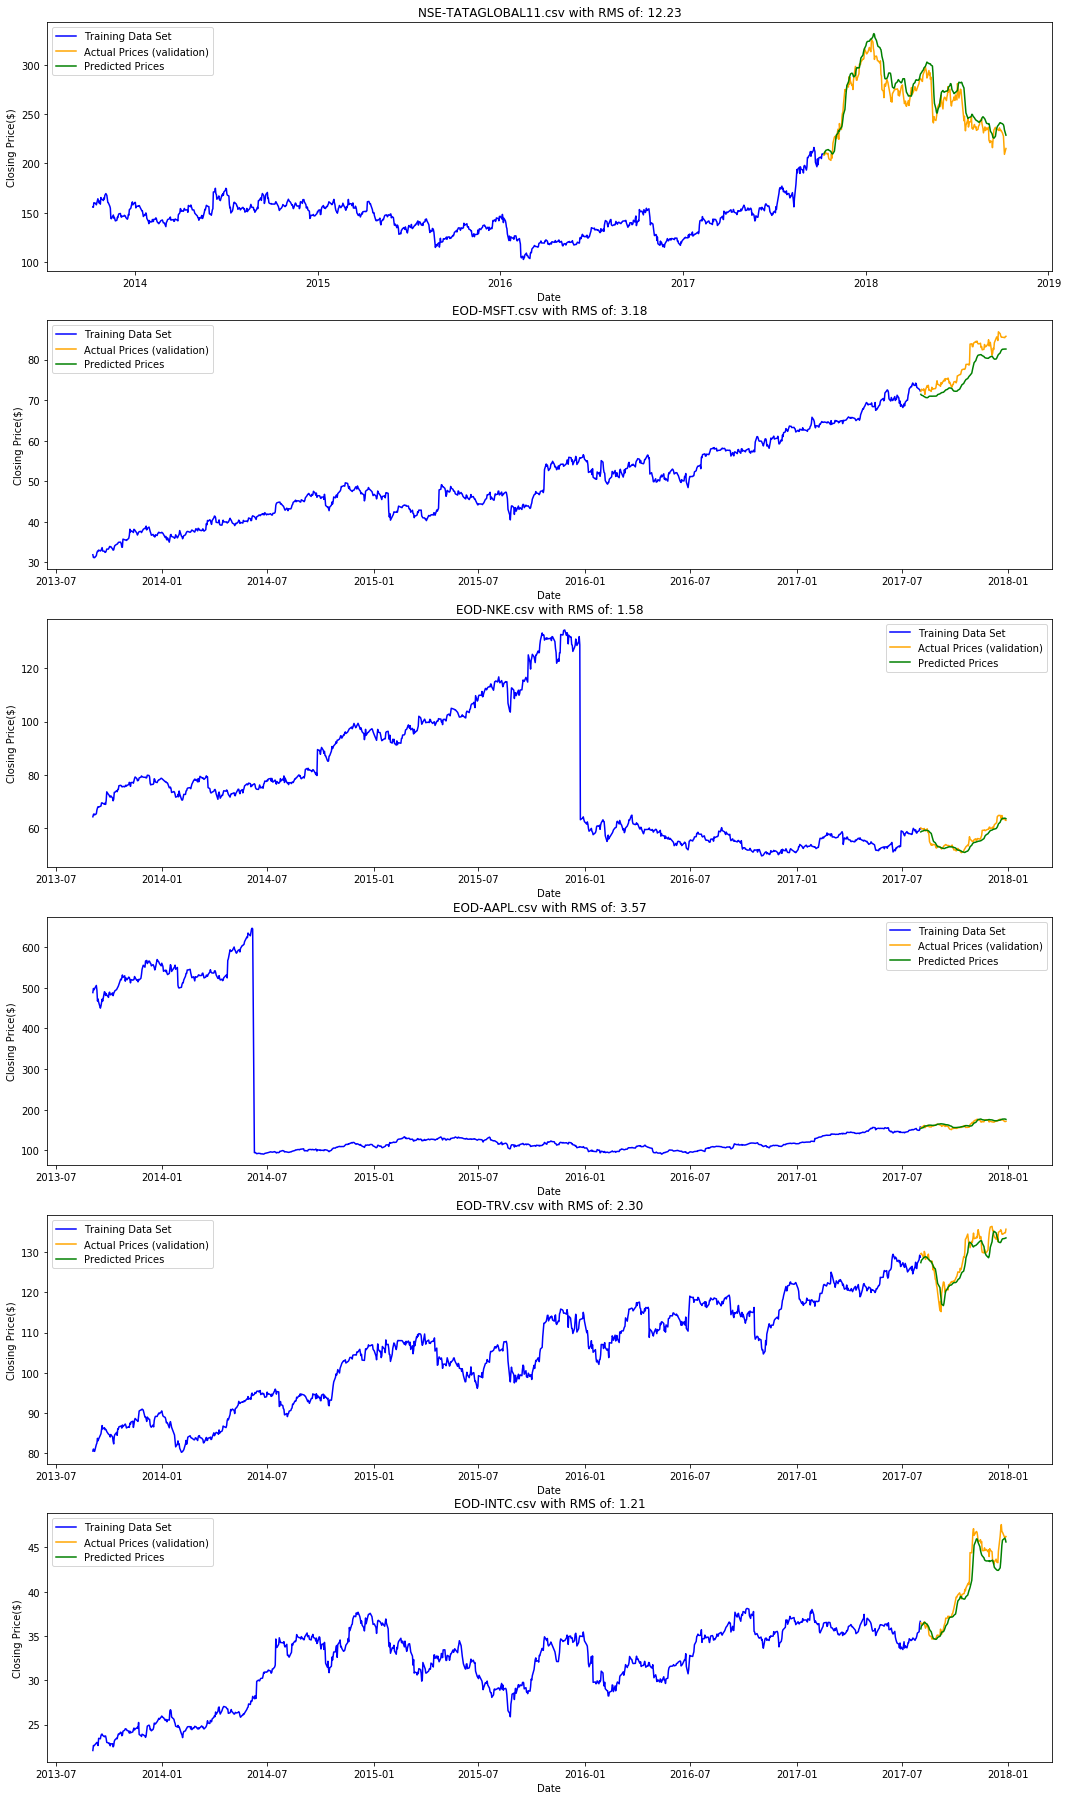

In [18]:
import warnings
warnings.filterwarnings("ignore")

Stocks = ['NSE-TATAGLOBAL11.csv','EOD-MSFT.csv','EOD-NKE.csv','EOD-AAPL.csv','EOD-TRV.csv','EOD-INTC.csv']

fig, axarr = plt.subplots(len(Stocks), 1)
fig.set_size_inches(18, 32)
j=0
for i in Stocks:
    x,y,z,rms = MakinMoney(i, 'LSTM')
    axarr[j].plot(x,label="Training Data Set", c = "blue")
    axarr[j].plot(y,label="Actual Prices (validation)", c = "orange")
    axarr[j].plot(z,label="Predicted Prices",c = "green")
    axarr[j].set_xlabel("Date")
    axarr[j].set_ylabel("Closing Price($)")     
    axarr[j].set_title(i + " with RMS of: {0:.2f}".format(rms))
    axarr[j].legend()
    j=j+1

# GENERAL FUNCTION CONSTRUCTED:

In [7]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
from pandas.plotting import register_matplotlib_converters
from fastai.structured import  add_datepart
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from pmdarima import auto_arima
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
register_matplotlib_converters()
rcParams['figure.figsize'] = 20,10



def MakinMoney(filename, method):
    """
    Input: The file name and method of machine learning prefered
    Output: Training dataset, Actual stock prices (validation set)
    
    """
    df = pd.read_csv(filename)
    df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
    df.index = df['Date']

    #plt.figure(figsize=(16,8))
    #plt.plot(df['Date'], df['Close'])
    #plt.xlabel("Date")
    #plt.ylabel("Closing Price")
    #plt.title("Closing Price of Stock")

    data = df.sort_index(ascending=True, axis=0)
    new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
    for i in range(0,len(data)):
        new_data['Date'][i] = data['Date'][i]
        new_data['Close'][i] = data['Close'][i]
 
   
    add_datepart(new_data, 'Date')
    new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp
    
    
    train = new_data[:987]
    valid = new_data[987:]
    x_train = train.drop('Close', axis=1)
    y_train = train['Close']
    x_valid = valid.drop('Close', axis=1)
    y_valid = valid['Close']

    if method == 'Linear Regression':
    
        model = LinearRegression()
        model.fit(x_train,y_train)
        preds = model.predict(x_valid)
        rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
        #print("Root Means Squared value for Linear Regression is:",rms)
        valid['Predictions'] = 0
        valid['Predictions'] = preds

        valid.index = data[987:].index
        train.index = data[:987].index
      
        
        
        
    elif method == 'KNeighbour':
        scaler = MinMaxScaler(feature_range=(0, 1))
        x_train_scaled = scaler.fit_transform(x_train)
        x_train = pd.DataFrame(x_train_scaled)
        x_valid_scaled = scaler.fit_transform(x_valid)
        x_valid = pd.DataFrame(x_valid_scaled)

        #using gridsearch to find the best parameter
        params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
        knn = neighbors.KNeighborsRegressor()
        model = GridSearchCV(knn, params, cv=5)

        #fit the model and make predictions
        model.fit(x_train,y_train)
        preds = model.predict(x_valid)
        rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
        #print("Root Means Squared value for the K-Neighbors method is:",rms)
        valid['Predictions'] = 0
        valid['Predictions'] = preds

        valid.index = data[987:].index
        train.index = data[:987].index

        
    
    elif method == 'ARIMA':
        training = train['Close']
        validation = valid['Close']

        model = auto_arima(training
                           ,start_p=1, start_q=1,max_p=3, max_q=3, m=5,start_P=0, d=1
                           ,D=1, trace=True,error_action='ignore'
                           ,seasonal=True, suppress_warnings=True)

        model.fit(training)

        forecast = model.predict(n_periods=len(valid))
        forecast1 = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])
        rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast1['Prediction'])),2)))
        #print("Root Means Squared value for the ARIMA method is:",rms)
        valid['Predictions'] = 0
        valid['Predictions'] = forecast
        
        valid.index = data[987:].index
        forecast1.index = data[987:].index
        train.index = data[:987].index
        
        
        
        
    elif method == 'LSTM':
        data = df.sort_index(ascending=True, axis=0)
        new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
        for i in range(0,len(data)):
            new_data['Date'][i] = data['Date'][i]
            new_data['Close'][i] = data['Close'][i]
        new_data.index = new_data.Date
        new_data.drop('Date', axis=1, inplace=True)
        dataset = new_data.values
        train = dataset[0:987,:]
        valid = dataset[987:,:]

        #converting dataset into x_train and y_train
        scaler = MinMaxScaler(feature_range=(0, 1))
        scaled_data = scaler.fit_transform(dataset)
        x_train, y_train = [], []
        for i in range(60,len(train)):
            x_train.append(scaled_data[i-60:i,0])
            y_train.append(scaled_data[i,0])
        x_train, y_train = np.array(x_train), np.array(y_train)

        x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

        # create and fit the LSTM network
        model = Sequential()
        model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
        model.add(LSTM(units=50))
        model.add(Dense(1))

        model.compile(loss='mean_squared_error', optimizer='adam')
        model.fit(x_train, y_train, epochs=2, batch_size=2, verbose=1)

        #predicting 246 values, using past 60 from the train data
        inputs = new_data[len(new_data) - len(valid) - 60:].values
        inputs = inputs.reshape(-1,1)
        inputs  = scaler.transform(inputs)
        
        X_test = []
        for i in range(60,inputs.shape[0]):
            X_test.append(inputs[i-60:i,0])
        X_test = np.array(X_test)

        X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
        closing_price = model.predict(X_test)
        closing_price = scaler.inverse_transform(closing_price)
        rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
        #print("Root Means Squared value for the Long Short Term Memory(LSTM) method is:",rms)
        train = new_data[:987]
        valid = new_data[987:]
        valid['Predictions'] = closing_price
        
        
    #plt.plot(train['Close'],label="Training Data Set")
    #plt.plot(valid[['Close']],label="Actual Prices (validation)")
    #plt.plot(valid[['Predictions']],label="Predicted Prices")
       
    #plt.xlabel("Date")
    #plt.ylabel("Closing Price($)")     
    #plt.title("Closing Price of Stock")
    #plt.legend()
        
    
        
    return train['Close'],valid[['Close']],valid[['Predictions']],rms



Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 5); AIC=4513.573, BIC=4538.016, Fit time=0.926 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 5); AIC=5153.582, BIC=5163.359, Fit time=0.034 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 5); AIC=4892.618, BIC=4912.173, Fit time=0.256 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 5); AIC=4512.884, BIC=4532.439, Fit time=0.943 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 5); AIC=4514.679, BIC=4539.122, Fit time=1.404 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 5); AIC=5154.827, BIC=5169.493, Fit time=0.106 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 5); AIC=4514.674, BIC=4539.117, Fit time=1.868 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 5); AIC=4516.772, BIC=4546.104, Fit time=1.362 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 1, 5); AIC=4511.382, BIC=4526.048, Fit time=0.696 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_o

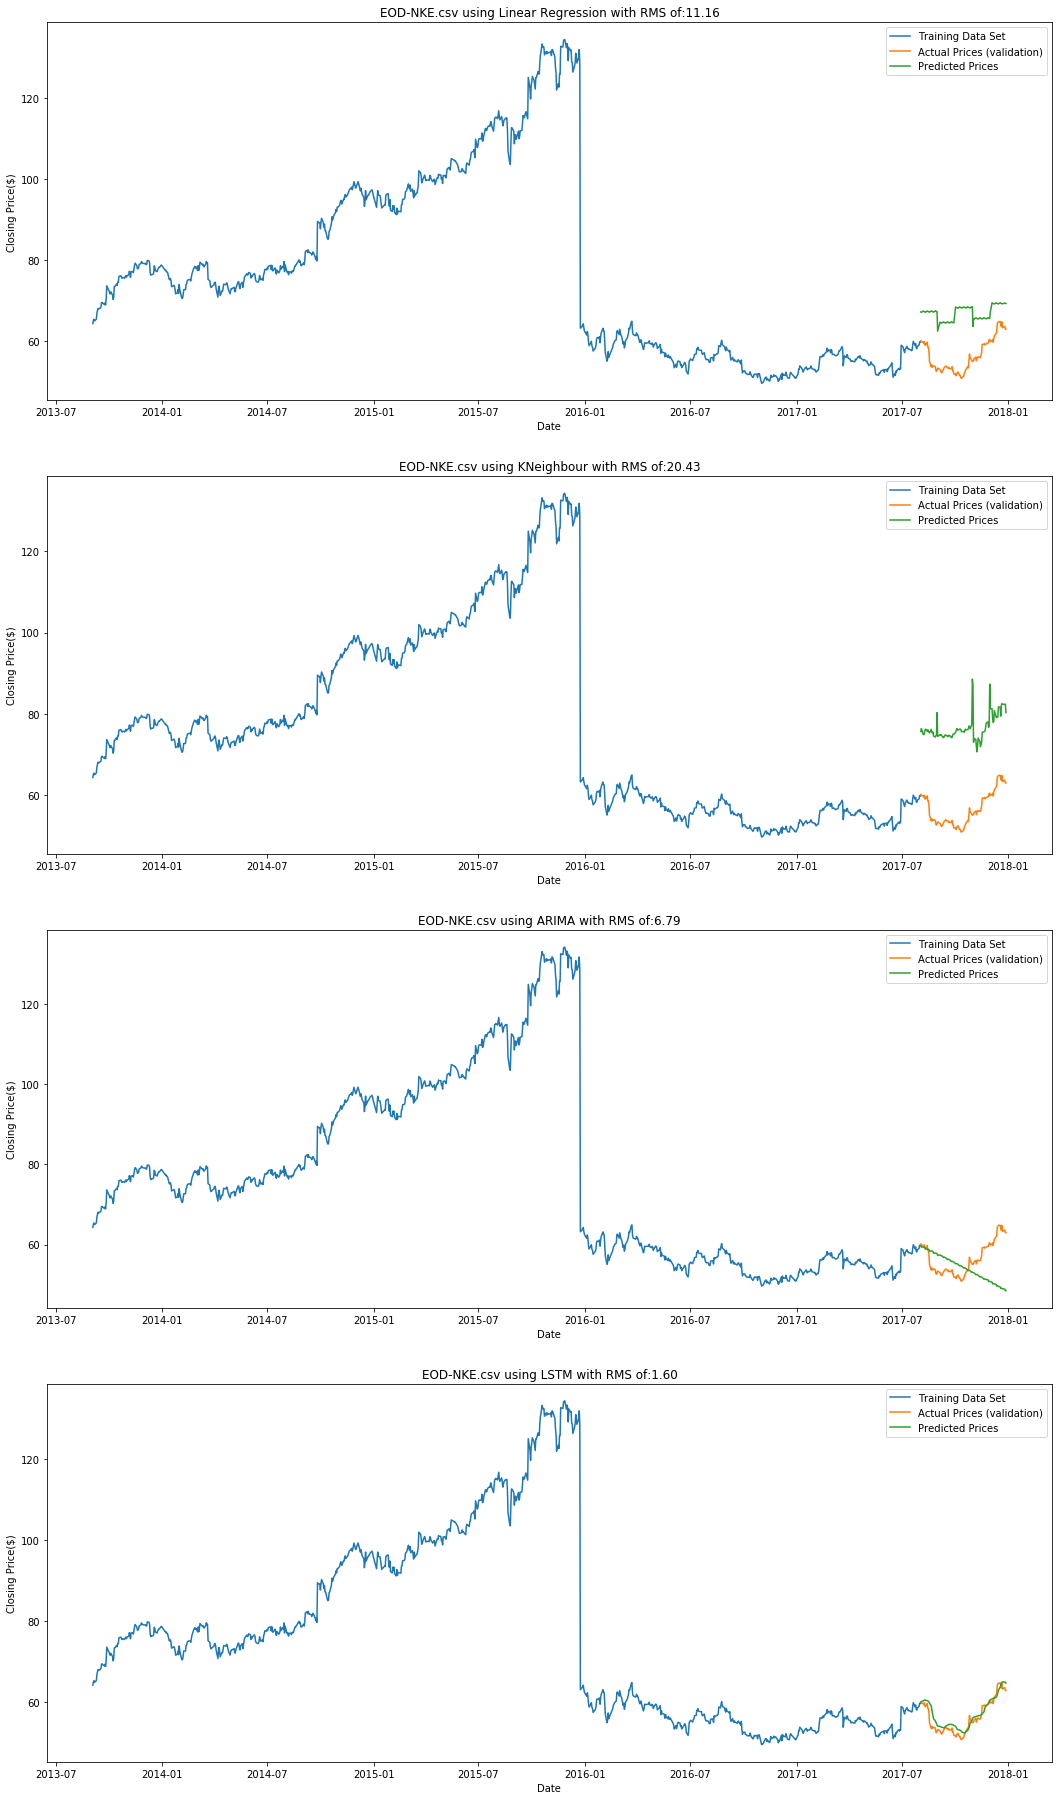

In [16]:
#METHODS LOOP 
"""
This is used to pick a certain stock named under 'filename' and run all the tests on it to see which 
is the best fit
"""
import warnings
warnings.filterwarnings("ignore")
Stocks = ['NSE-TATAGLOBAL11.csv','EOD-MSFT.csv',
          'EOD-NKE.csv','EOD-AAPL.csv',
          'EOD-TRV.csv','EOD-INTC.csv']
methods= [
    'Linear Regression',
    'KNeighbour'
          ,'ARIMA','LSTM'
         ]

fig, axarr = plt.subplots(len(methods), 1)
fig.set_size_inches(18, 32)


j=0
for i in methods:
    filename1 = 'EOD-NKE.csv'
    x,y,z,rms = MakinMoney(filename1,i)
    axarr[j].plot(x,label="Training Data Set")
    axarr[j].plot(y,label="Actual Prices (validation)")
    axarr[j].plot(z,label="Predicted Prices")
    axarr[j].set_xlabel("Date")
    axarr[j].set_ylabel("Closing Price($)")     
    axarr[j].set_title(filename1 +" using "+i+ " with RMS of:{0:.2f}".format(rms))
    axarr[j].legend()
    j = j + 1

In [ ]:
Stocks = ['NSE-TATAGLOBAL11.csv','EOD-MSFT.csv','EOD-NKE.csv','EOD-AAPL.csv','EOD-TRV.csv','EOD-INTC.csv']
methods= [
    #'Linear Regression',
    #,'KNeighbour',
    'ARIMA',
    'LSTM',
         ]
fig, axarr = plt.subplots(len(Stocks), len(methods))
fig.set_size_inches(28, 32)
j=0
for i in Stocks:
    k=0
    for l in methods:
        x,y,z,rms = MakinMoney(i,l)
        axarr[j,k].plot(x,label="Training Data Set")
        axarr[j,k].plot(y,label="Actual Prices (validation)")
        axarr[j,k].plot(z,label="Predicted Prices")
        axarr[j,k].set_xlabel("Date")
        axarr[j,k].set_ylabel("Closing Price($)")     
        axarr[j,k].set_title(i +" using "+l+ " with RMS of:{0:.2f}".format(rms))
        axarr[j,k].legend()
        k=k+1
    j=j+1
fig.savefig('STONKS.png')

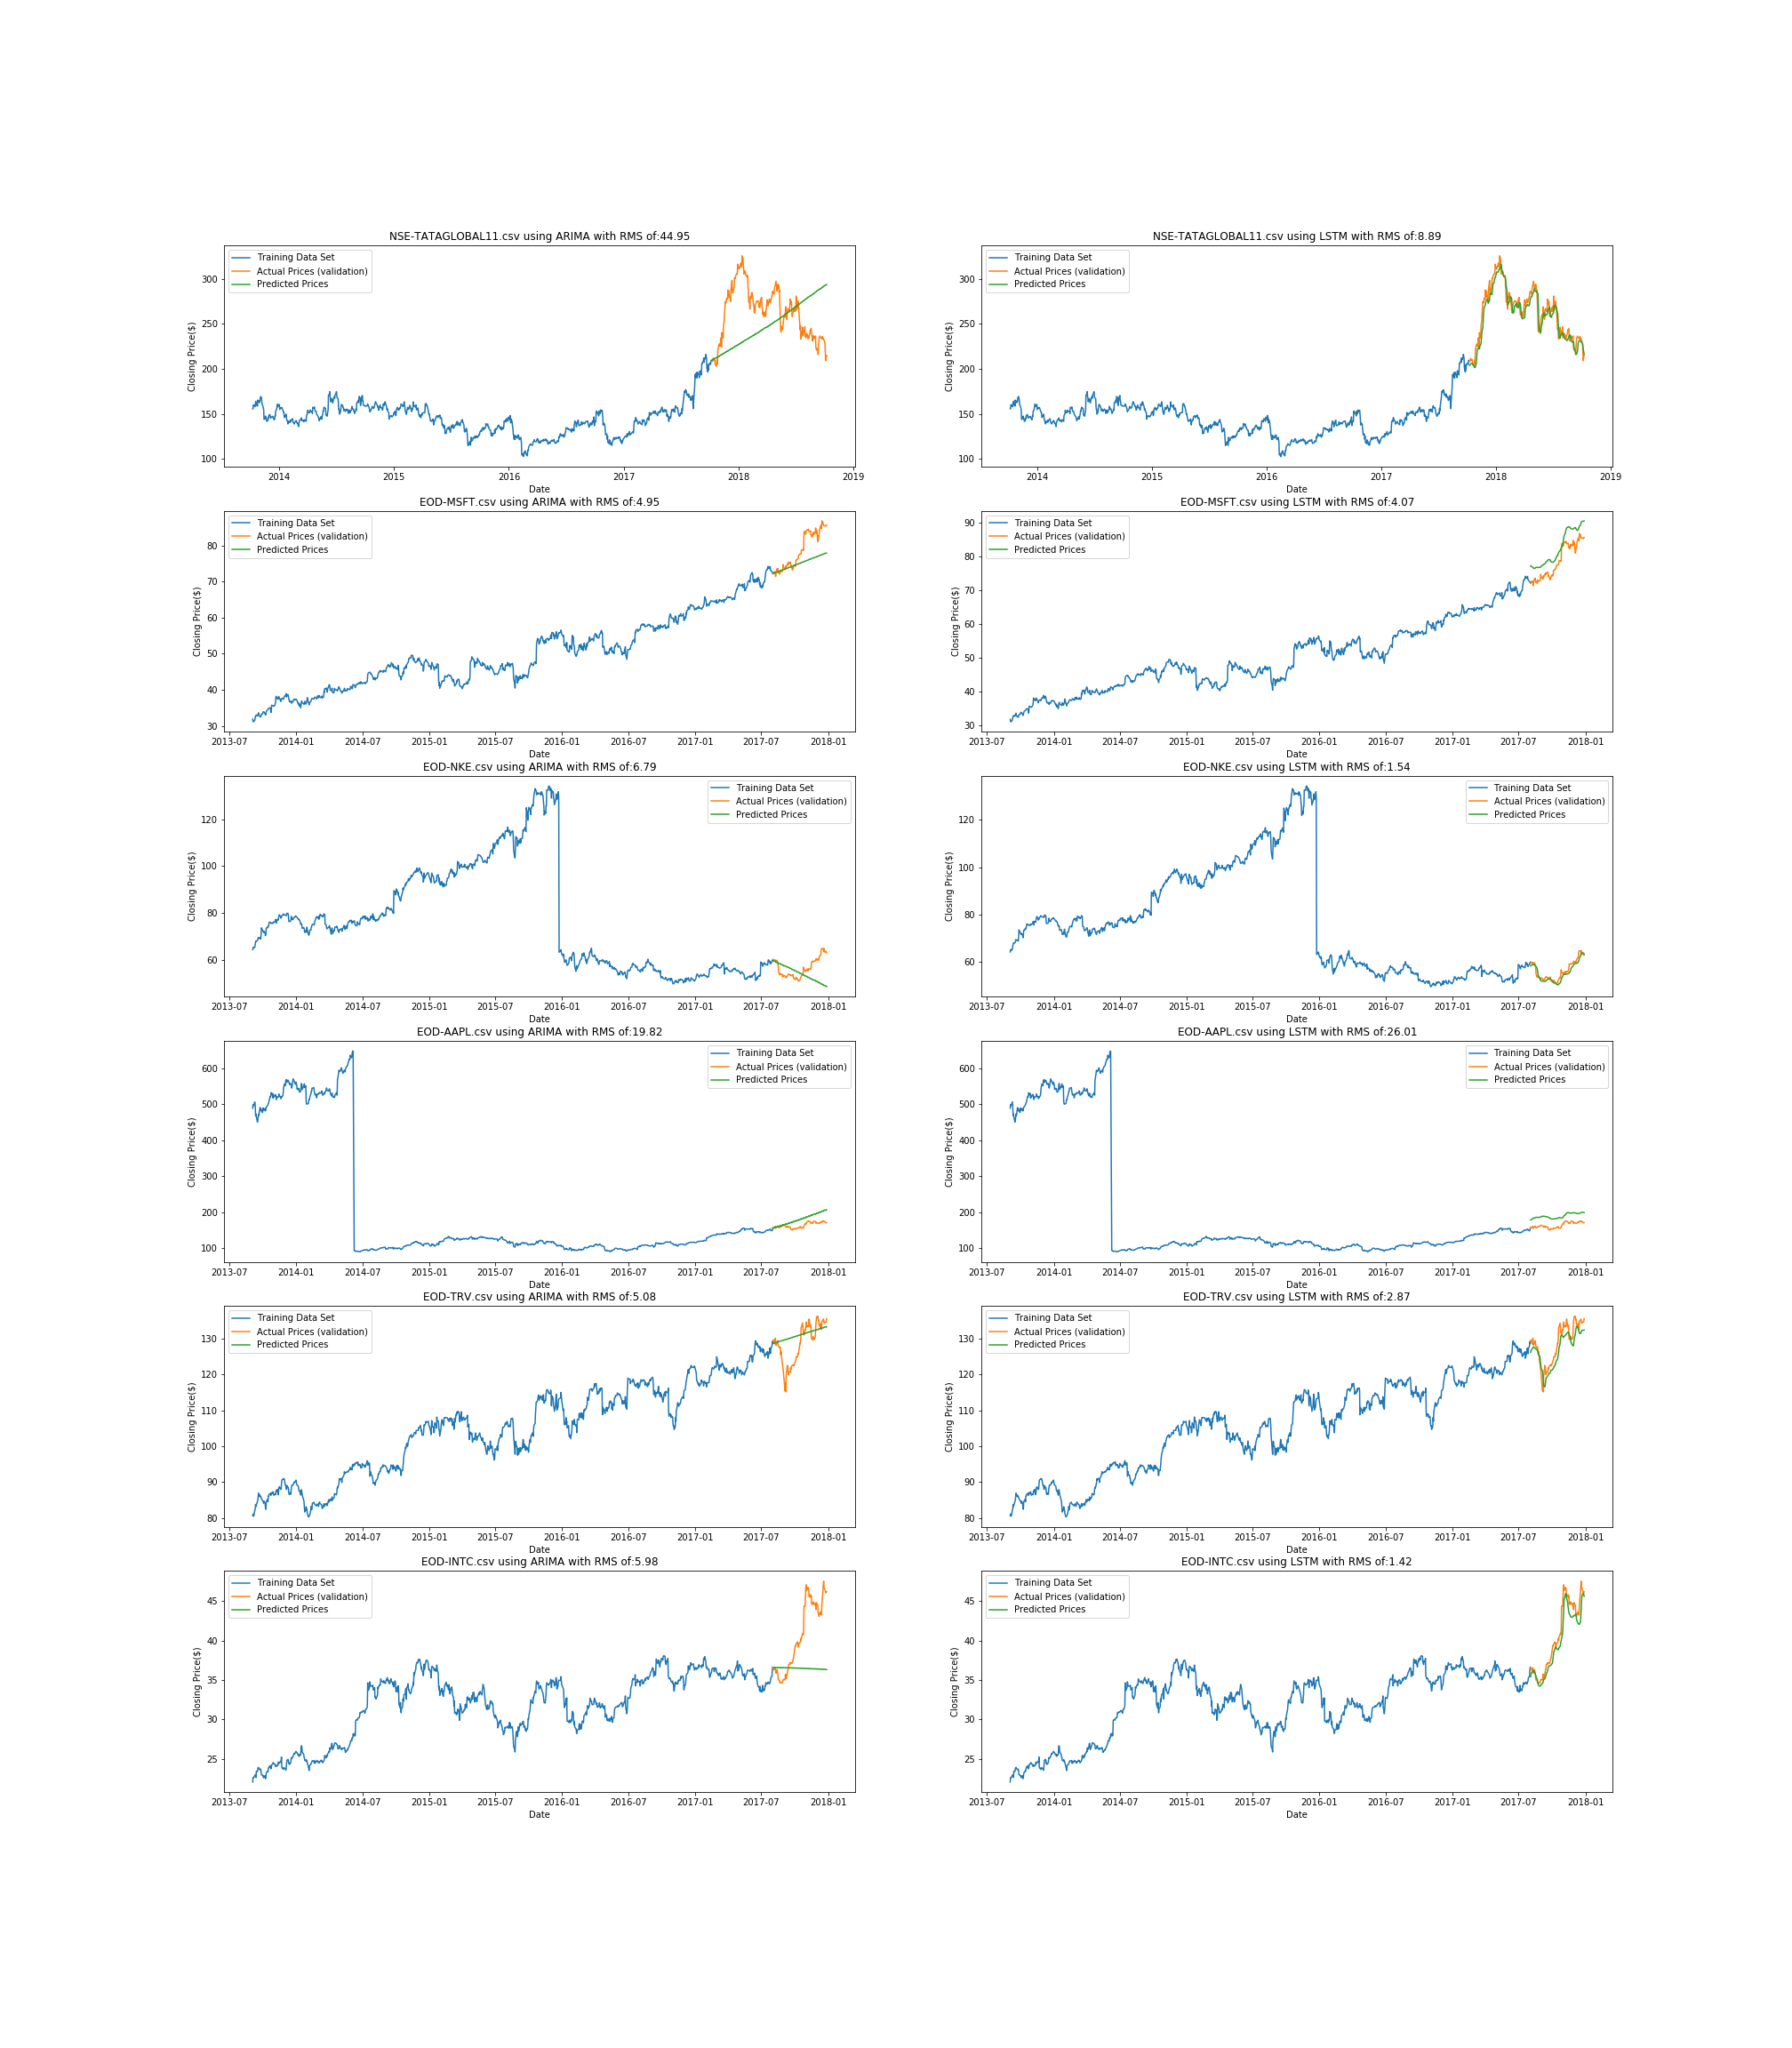

In [26]:
from IPython.display import display, Image
display(Image(filename='STONKS.png'))



Works Cited:
https://www.analyticsvidhya.com/blog/2018/10/predicting-stock-price-machine-learningnd-deep-learning-techniques-python/